Import Libraries

In [ ]:
import numpy as np
import pandas as pd

Load files into Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving us_flight.csv to us_flight.csv


Read CSV file as dataframe and assign to variable ***data***

***data.fillna(np.nan)*** is used to fill empty cells with NaN

***.sample(n=5)*** method gets a random set of 5 rows from the DataFrame. 


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['us_flight.csv']))
data = data.fillna(np.nan)
data.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
127607,2015-01-13 00:00:00,OO,6342.0,SAN,LAX,-20.0,0.0,109.0,NaN,NaN,NaN,NaN,NaN,45.0
71855,2015-01-05 00:00:00,WN,4287.0,MKE,FLL,0.0,0.0,1243.0,NaN,NaN,NaN,NaN,NaN,182.0
144594,2015-01-04 00:00:00,UA,1438.0,IAH,LAX,2.0,0.0,1379.0,NaN,NaN,NaN,NaN,NaN,234.0
44508,2015-01-08 00:00:00,DL,2177.0,ATL,SEA,15.0,0.0,2182.0,0.0,0.0,0.0,15.0,0.0,349.0
54833,2015-01-12 00:00:00,DL,1665.0,ATL,SRQ,-12.0,0.0,444.0,NaN,NaN,NaN,NaN,NaN,85.0


***.sort_values()*** by ***arr_delay*** *(the number of given minutes a flight is delayed)*. Setting *ascending* to False arranges the column in descending order to see longest-delayed flight.

In [ ]:
data.sort_values(by='arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11 00:00:00,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0
10214,2015-01-13 00:00:00,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0
12430,2015-01-03 00:00:00,AA,1677.0,MEM,DFW,1384.0,0.0,432.0,1380.0,0.0,0.0,4.0,0.0,104.0
8443,2015-01-04 00:00:00,AA,1279.0,OMA,DFW,1237.0,0.0,583.0,1222.0,0.0,15.0,0.0,0.0,102.0
10328,2015-01-05 00:00:00,AA,1495.0,EGE,DFW,1187.0,0.0,721.0,1019.0,0.0,168.0,0.0,0.0,127.0
36570,2015-01-04 00:00:00,DL,1435.0,MIA,MSP,1174.0,0.0,1501.0,1174.0,0.0,0.0,0.0,0.0,231.0
36495,2015-01-04 00:00:00,DL,1367.0,ROC,ATL,1138.0,0.0,749.0,1112.0,0.0,0.0,26.0,0.0,171.0
59072,2015-01-14 00:00:00,DL,1687.0,SAN,MSP,1084.0,0.0,1532.0,1070.0,0.0,0.0,14.0,0.0,240.0
32173,2015-01-05 00:00:00,AA,970.0,LAS,LAX,1042.0,0.0,236.0,1033.0,0.0,9.0,0.0,0.0,66.0
56488,2015-01-12 00:00:00,DL,2117.0,ATL,COS,1016.0,0.0,1184.0,1016.0,0.0,0.0,0.0,0.0,193.0


The ***.apply()*** function is going through every record one-by-one in the data['arr_delay'] series, where x is each record. The lambda function checks if the value of each arr_delay record is greater than zero, then returns True or False. 

***.value_counts()*** method counts the values in this new column to see what proportion of flights are delayed

In [ ]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)
data['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

Percentage of flights that were delayed

In [ ]:
not_delayed = data['delayed'].value_counts()[0] 
delayed = data['delayed'].value_counts()[1] 
total_flights = not_delayed + delayed
print ((delayed) / total_flights *100, '%')

48.906597112027924 %


Besides being delayed, some flights were cancelled. Those flights had a delay of "0", because they never left. What percentage of the flights in this dataset were cancelled?

In [ ]:
data['cancelled'].value_counts()

0.0    196873
1.0      4791
Name: cancelled, dtype: int64

Percentage of flights that were cancelled

In [ ]:
not_delayed, delayed = data['cancelled'].value_counts()
print (delayed / (delayed + not_delayed) * 100, '%')

2.375733894001904 %


***groupby()*** function splits the dataset data into buckets by carrier *('unique_carrier')*, and then splits the records inside each carrier bucket into delayed or not delayed *('delayed')*. The result is assigned to the *group_by_carrier* variable.

***.size()*** method counts the number of rows in each grouping

In [ ]:
group_by_carrier = data.groupby(['unique_carrier','delayed'])
group_by_carrier.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

The above result is a little hard to read. ***.unstack()*** method converts the results into a more readable format. The result is stored as a new variable, *count_delays_by_carrier*.

In [ ]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


***.plot()*** function stacks the values vertically (instead of allowing them to overlap) with *stacked=True:* argument

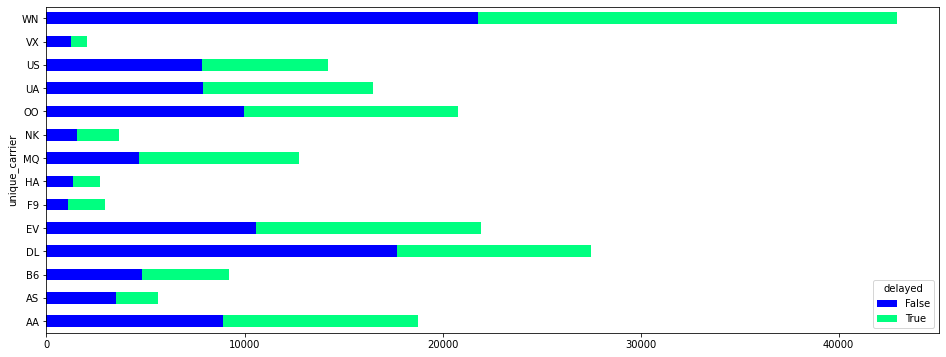

In [ ]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

How many flights were delayed longer than 20 minutes?

What proportion of delayed flights does this represent?

In [ ]:
data['delayed_20'] = data['arr_delay'].apply(lambda x: x > 20)
delay_counts = data['delayed_20'].value_counts()
delay_counts

False    152985
True      48679
Name: delayed_20, dtype: int64

Percentage of flights delayed for more than 20 minutes

In [ ]:
print ('Flights delayed longer than 20 min:', delay_counts[1]/(delay_counts[1] + delay_counts[0]) * 100, '%')

Flights delayed longer than 20 min: 24.138666296413838 %


***.pivot_table()*** of the number of flights *('flight_num')* each carrier *('unique_carrier')* flew on each day *('flight_date')*

In [ ]:
flights_by_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396


***.pivot table*** for type of delay *('delay_list')* on each day *('flight_date')*, summing the number of minutes of each type of delay

In [ ]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03 00:00:00,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04 00:00:00,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05 00:00:00,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06 00:00:00,92383.0,156971.0,94990.0,372.0,26299.0
2015-01-07 00:00:00,66708.0,96301.0,64607.0,165.0,17763.0
2015-01-08 00:00:00,74861.0,101703.0,70006.0,510.0,33015.0
2015-01-09 00:00:00,80123.0,112193.0,50703.0,182.0,15076.0
2015-01-10 00:00:00,50056.0,34610.0,13958.0,116.0,5683.0


Stacked area chart of sum of minutes delayed, by type of delay *('flights_delays_by_day')*

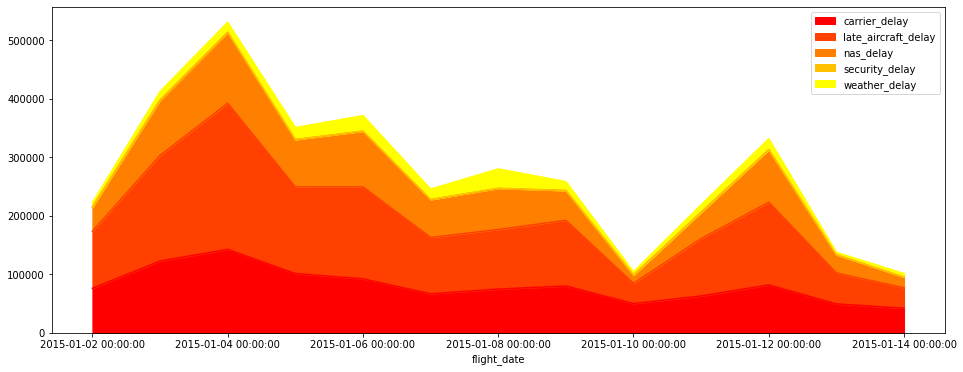

In [ ]:
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='autumn')

***.value_counts()*** method counts the number of delays for each airline *('unique_carrier')*

In [ ]:
delayed_flights = data[data['delayed'] == True] 
delayed_flights['unique_carrier'].value_counts()

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

Group flights by unique_carrier and delayed, get the count with ***.size()***, use ***.unstack()*** to return a DataFrame. 

***.reset_index()*** to clean up the index and, assign the new DataFrame to a variable *(delayed_by_carrier)*

In [ ]:
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


Create derived column *(flights_count)* that sums delayed *(delayed_by_carrier[True])* and on-time *(delayed_by_carrier[False])* flights for each carrier

In [ ]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flights_count
0,AA,8912,9841,18753
1,AS,3527,2104,5631
2,B6,4832,4401,9233
3,DL,17719,9803,27522
4,EV,10596,11371,21967


Derived column for proportion of delayed flights *(proportion_delayed)*

In [ ]:
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
delayed_by_carrier[:4]

delayed,unique_carrier,False,True,flights_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188


Sorted proportion of flights delayed with ***.sort_values*** in descending order.

In [ ]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flights_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


Data pivot table with mean delay time aggregated by airline.

In [ ]:
data.pivot_table(columns='unique_carrier', values='arr_delay')

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
arr_delay,15.616299,1.731951,13.576129,4.118949,18.35852,28.836953,6.458937,35.627406,22.77967,19.031663,16.094772,7.671557,3.833908,11.273536


***data['unique_carrier'] == 'WN']*** creates a boolean index that returns True for rows that represent WN flights

Wrapping that in data[...] applies the boolean index to the DataFrame data.

['arr_delay'] reduces the columns to just the ['arr_delay'] column (and the index).

The result is passed to a new variable *southwest*

***.describe()*** is applied to the variable to show basic statistics, such as the mean, min, max, and standard deviation.

In [ ]:
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

***.arange()*** method creates a list of numbers that define bins of ten minute intervals *(steps=10)*, ranging from 50 minutes early *(start=-50)* to 200 minutes late *(stop=200)*

In [ ]:
bin_values = np.arange(start=-50, stop=200, step=10)
print (bin_values)

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


Histogram plot using the *bin_values* variable created above to show distribution of WN flight delays

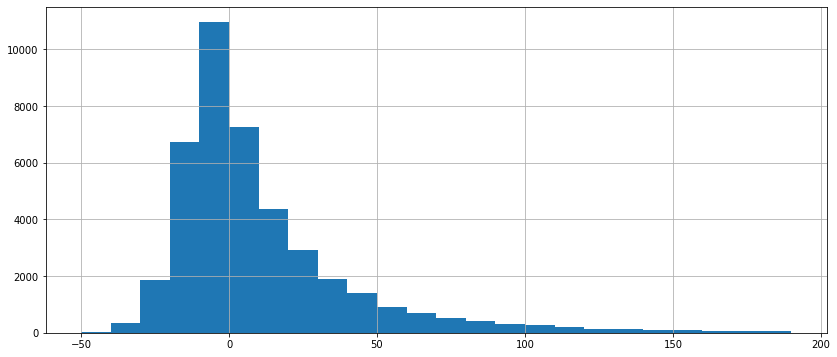

In [ ]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

Compare the distribution of two airlines with a similar number of total flights, US and MQ

unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

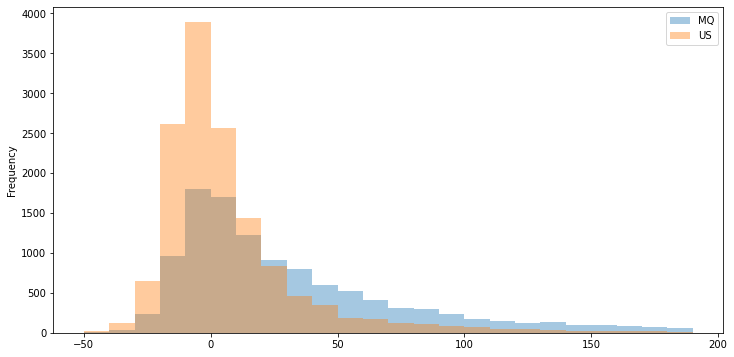

In [ ]:
bin_values = np.arange(start=-50, stop=200, step=10)
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ']) 
us_mq_airlines = data[us_mq_airlines_index] 
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay'] 
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True)

Use ***.describe()*** to see key statistics about the carriers

In [ ]:
group_carriers.describe()

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0


20 highest volume airports by origin

In [ ]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

Extracted list of 20 high volume airports

In [ ]:
hi_volume_airports_names = hi_volume.index.tolist()
print (hi_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


Filter data for values matching list of high volume airports with ***.isin()*** method

View first few rows with ***head()***

In [ ]:
hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed,delayed_20
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True,True


Pivot table showing the mean value of the flight delays *(arr_delays)* for each airport *(origin)* on each day *(flight_date)*. Table assigned to new variable *(high_volume_airports_pivots)*

In [ ]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


***.describe()*** to show the mean and dispersion for each airport

In [ ]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


Visualize the above pivot table with histogram plot



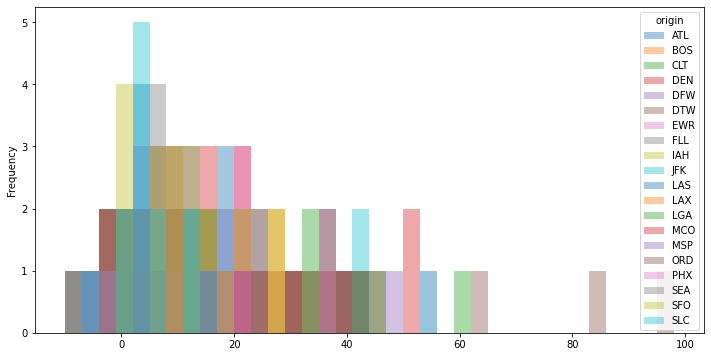

In [ ]:
airport_bins = np.arange(-10,100,3)
hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,6], alpha=.4, legend=True)

The above histogram plot is a little hard to read. Use box plots to compare the day-to-day distribution of delays at each airport.

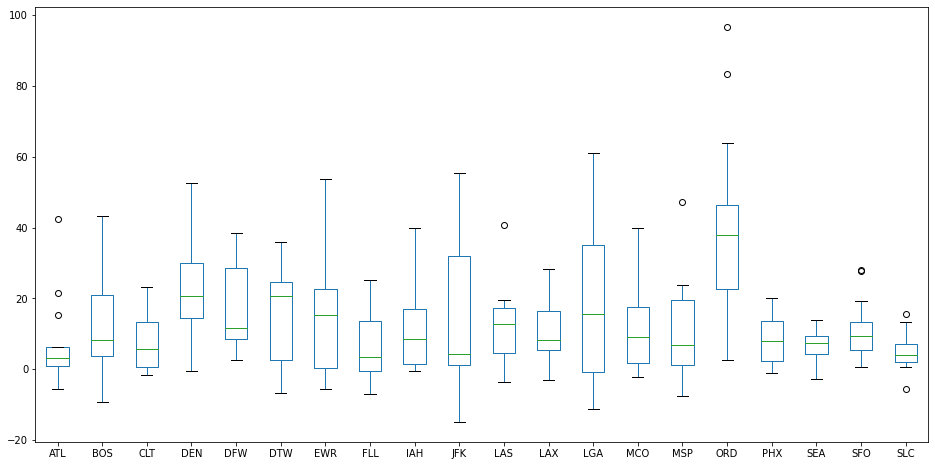

In [ ]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

It's visually simpler to compare many distributions with box plots. Airports like JFK had significant dispersion of delays, while LGA was evenly distributed around the most frequent average delay. ORD, however, was almost twice as delayed all the time, compared to every other high volume airport